## LYFT
### Linear Regression

In [62]:
from sklearn.model_selection import train_test_split
y = lyft_data.price
#First test we only use distance and surge_multiplier as our only continuous factors
X = lyft_data.loc[:,['distance', 'surge_multiplier']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(245926, 2) (245926,)
(61482, 2) (61482,)


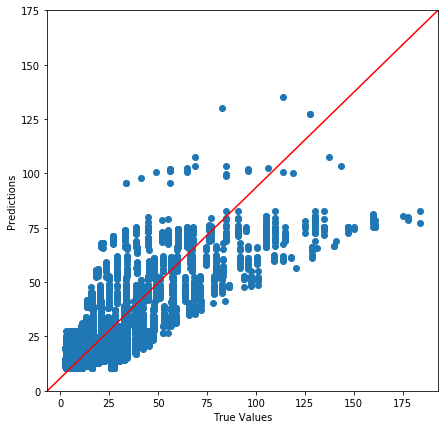

In [75]:
from sklearn import datasets, linear_model
import numpy as np
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y_test, predictions)
plt.yticks(np.arange(0, 200, step=25))
plt.xlabel('True Values')
plt.ylabel('Predictions')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

In [53]:
print('Score:', model.score(X_test, y_test))

Score: 0.43197196519207376


In [59]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

#Try 5 fold cross validation to see potential variance in our predictions
scores = cross_val_score(model, X, y, cv=5)
print('CV scores:', scores)

CV scores: [0.43323586 0.43356633 0.43046493 0.41584001 0.43728773]


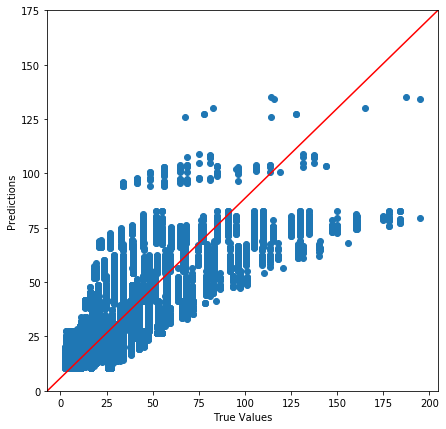

In [76]:
predictions = cross_val_predict(model, X, y, cv=5)
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(y, predictions)
plt.yticks(np.arange(0, 200, step=25))
plt.xlabel('True Values')
plt.ylabel('Predictions')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

In [60]:
accuracy = metrics.r2_score(y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.4302268707669036


### Random Forests 

In [70]:
from sklearn.ensemble import RandomForestRegressor

#instantiate model with 10 decision trees
rf = RandomForestRegressor(n_estimators=10, random_state = 42)

#train model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [71]:
predictions = rf.predict(X_test)

#calculate absolute errors
errors = abs(predictions - y_test)
print('Mean absolute error: ', round(np.mean(errors), 2), 'degrees.')

Mean absolute error:  7.53 degrees.


In [73]:
#calculate mean absolute percentage error
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy, 2), '%.')

Accuracy:  36.52 %.


In [74]:
importances = list(rf.feature_importances_)

feature_importances = [ (feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: surge_multiplier     Importance: 0.75
Variable: distance             Importance: 0.25


#### Using dummy variables - Lyft

In [77]:
y = lyft_data.price
#Second test we create dummy variables for destination, source, name (product_id is the same as name)
dummied_lyft_data = pd.get_dummies(lyft_data, columns=['destination', 'source', 'name'], drop_first=True)
X = dummied_lyft_data.drop(columns=['cab_type','time_stamp', 'id', 'product_id'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(245926, 30) (245926,)
(61482, 30) (61482,)


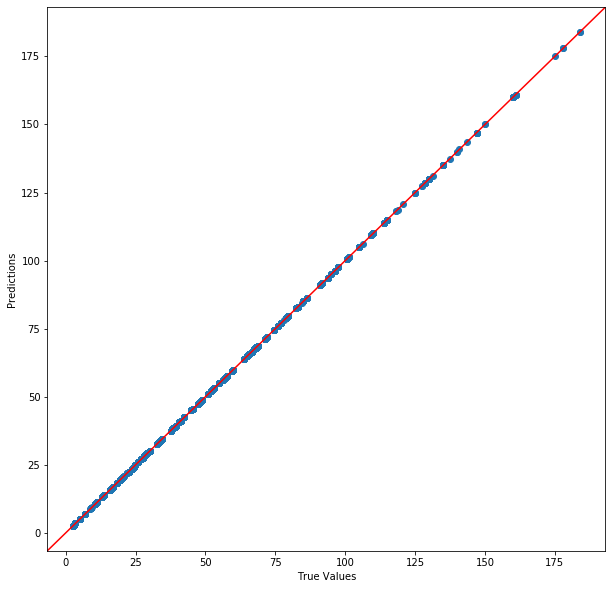

In [78]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, predictions)
plt.yticks(np.arange(0, 200, step=25))
plt.xlabel('True Values')
plt.ylabel('Predictions')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

In [79]:
print('Score:', model.score(X_test, y_test))

Score: 1.0


With a fit score of exactly 1 this is most likely an overfitted model.

In [80]:
#Try 5 fold cross validation to confirm our findings
scores = cross_val_score(model, X, y, cv=5)
print('CV scores:', scores)

CV scores: [1. 1. 1. 1. 1.]


In [81]:
rf = RandomForestRegressor(n_estimators=10, random_state = 42)

#train model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [82]:
predictions = rf.predict(X_test)

#calculate absolute errors
errors = abs(predictions - y_test)
print('Mean absolute error: ', round(np.mean(errors), 2), 'degrees.')

Mean absolute error:  0.0 degrees.


In [83]:
#calculate mean absolute percentage error
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy, 2), '%.')

Accuracy:  100.0 %.


In [84]:
importances = list(rf.feature_importances_)

feature_importances = [ (feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: surge_multiplier     Importance: 1.0
Variable: distance             Importance: 0.0


### UBER

In [125]:
y = uber_data.price
#First test we only use distance and surge_multiplier as our only continuous factors
X = uber_data.loc[:,['distance', 'surge_multiplier']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(264454, 2) (264454,)
(66114, 2) (66114,)


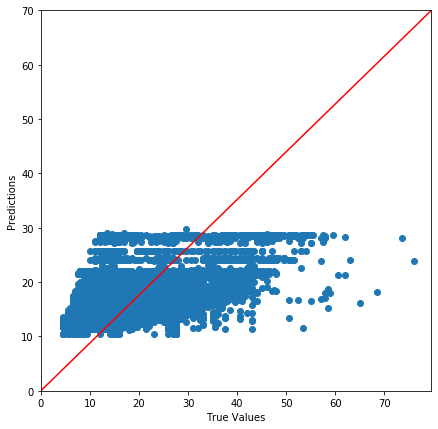

In [126]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y_test, predictions)
plt.xticks(np.arange(0, 80, step=10))
plt.yticks(np.arange(0, 80, step=10))
plt.xlabel('True Values')
plt.ylabel('Predictions')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)



In [127]:
print('Score:', model.score(X_test, y_test))

Score: 0.10985819294871513


In [128]:
#Try 5 fold cross validation to see potential variance in our predictions
scores = cross_val_score(model, X, y, cv=5)
print('CV scores:', scores)

CV scores: [0.11508637 0.11607605 0.11216367 0.11169404 0.11003401]


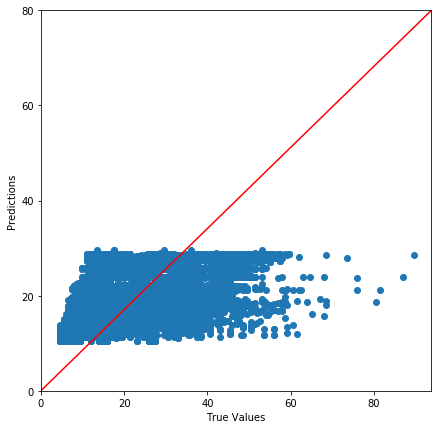

In [129]:
predictions = cross_val_predict(model, X, y, cv=5)
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(y, predictions)
plt.xticks(np.arange(0, 100, step=20))
plt.yticks(np.arange(0, 100, step=20))
plt.xlabel('True Values')
plt.ylabel('Predictions')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)



In [130]:
accuracy = metrics.r2_score(y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.11302726305689426


In [131]:
from sklearn.ensemble import RandomForestRegressor

#instantiate model with 10 decision trees
rf = RandomForestRegressor(n_estimators=10, random_state = 42)

#train model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [132]:
predictions = rf.predict(X_test)

#calculate absolute errors
errors = abs(predictions - y_test)
print('Mean absolute error: ', round(np.mean(errors), 2), 'degrees.')

Mean absolute error:  6.71 degrees.


In [133]:
#calculate mean absolute percentage error
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy, 2), '%.')

Accuracy:  50.42 %.


In [134]:
importances = list(rf.feature_importances_)

feature_importances = [ (feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: distance             Importance: 1.0
Variable: surge_multiplier     Importance: 0.0


#### Using dummy variables - Uber

In [116]:
y = uber_data.price
#Second test we create dummy variables for destination, source, name (product_id is the same as name)
dummied_uber_data = pd.get_dummies(uber_data, columns=['destination', 'source', 'name'], drop_first=True)
X = dummied_uber_data.drop(columns=['cab_type','time_stamp', 'id', 'product_id'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(264454, 30) (264454,)
(66114, 30) (66114,)


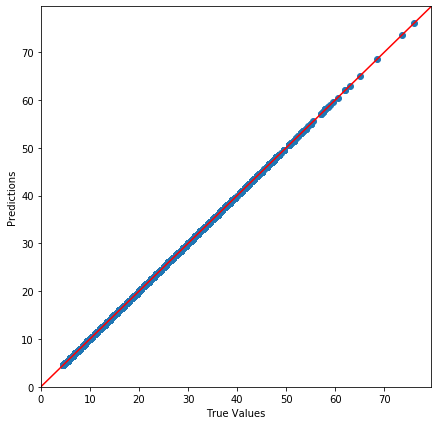

In [117]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y_test, predictions)
plt.xticks(np.arange(0, 80, step=10))
plt.yticks(np.arange(0, 80, step=10))
plt.xlabel('True Values')
plt.ylabel('Predictions')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

In [118]:
print('Score:', model.score(X_test, y_test))

Score: 1.0


With a fit score of exactly 1 this is most likely an overfitted model.

In [119]:
#Try 5 fold cross validation to confirm our findings
scores = cross_val_score(model, X, y, cv=5)
print('CV scores:', scores)

CV scores: [1. 1. 1. 1. 1.]


In [120]:
rf = RandomForestRegressor(n_estimators=10, random_state = 42)

#train model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [121]:
predictions = rf.predict(X_test)

#calculate absolute errors
errors = abs(predictions - y_test)
print('Mean absolute error: ', round(np.mean(errors), 2), 'degrees.')

Mean absolute error:  0.0 degrees.


In [122]:
#calculate mean absolute percentage error
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy, 2), '%.')

Accuracy:  100.0 %.


In [123]:
importances = list(rf.feature_importances_)

feature_importances = [ (feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: surge_multiplier     Importance: 1.0
Variable: distance             Importance: 0.0
